Reserch Questions:
1.what are the variables that affect hotels resrvations cancellations?
2.how can we make hotels reservations cancelled better?
3.how will hotels be assisted in making pricing and promotonal decisions?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/11/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/10/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2015' in DD/MM/YYYY format. Provide format or specif

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
D =df.describe(include='object')

In [9]:
for i in D:
    print(i)
    print(df[i].unique())
    print("------------------------------------------------------------------------------------")

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZ

In [10]:
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
list=[]
for i in df.describe():
    list.append(i)
print(list)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


<AxesSubplot:>

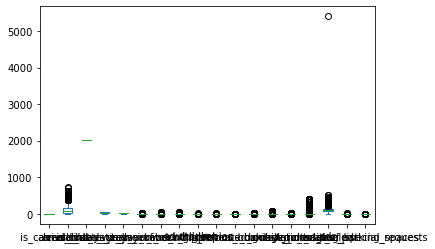

In [14]:
df[list].plot(kind='box')

<AxesSubplot:>

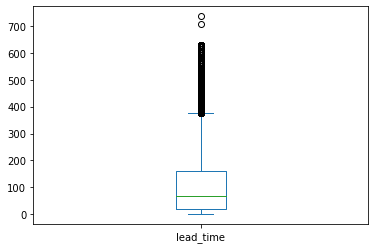

In [15]:
df['lead_time'].plot(kind='box')

In [16]:
df=df[df['lead_time']<400]

<AxesSubplot:>

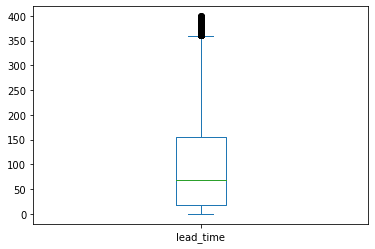

In [17]:
df['lead_time'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x17fd6b5a310>,
 'caps': [<matplotlib.lines.Line2D at 0x17fd6b5a8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fd6b5a040>],
 'medians': [<matplotlib.lines.Line2D at 0x17fd6b5ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fd6b68160>],
 'means': []}

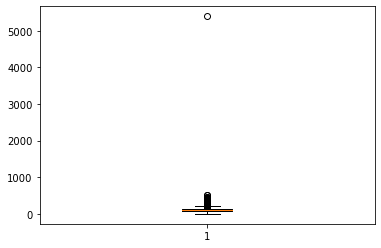

In [18]:
plt.boxplot(df['adr'])

In [19]:
df=df[df['adr']<300]

{'whiskers': [<matplotlib.lines.Line2D at 0x17fd6bb9910>,
 'caps': [<matplotlib.lines.Line2D at 0x17fd6bb9eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fd6bb9640>],
 'medians': [<matplotlib.lines.Line2D at 0x17fd6da74c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17fd6da7790>],
 'means': []}

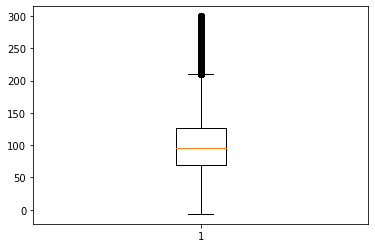

In [20]:
plt.boxplot(df['adr'])

In [21]:
df.shape


(116494, 30)

0    0.634694
1    0.365306
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

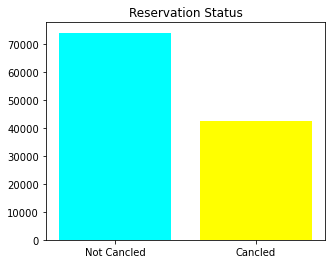

In [60]:
cancelled=df['is_canceled'].value_counts(normalize=True)
print(cancelled)

plt.figure(figsize=(5,4))
plt.title("Reservation Status")
plt.bar(['Not Cancled','Cancled'],df['is_canceled'].value_counts(),color=['cyan',
                                                    'Yellow',])

The bar graph shows the percentage of reservations that are cancled and those that are not. it is obvious that there are still a significant number of reservation that have not been cancled. There are still 37% of clients who cancled their resrvation,which have a significant impact on the hotels earnings. 

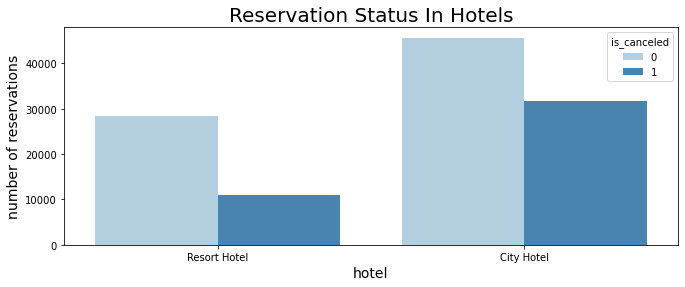

In [23]:
plt.figure(figsize=(11,4))
axis1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels,_=axis1.get_legend_handles_labels()

plt.title("Reservation Status In Hotels",size=20)
plt.xlabel("hotel",size=14)
plt.ylabel("number of reservations",size=14)
plt.show()

In abve chart we can see that in comparison to resort hotels, city hotels have more bookings.It's possible that resort hotels are more expensive than those in city hotels.Also we can see that reservation cancelation is more in city hotesls it's moe than 50% compare to resort hotel.

In [24]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.721667
1    0.278333
Name: is_canceled, dtype: float64

In [25]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.590564
1    0.409436
Name: is_canceled, dtype: float64

In [26]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

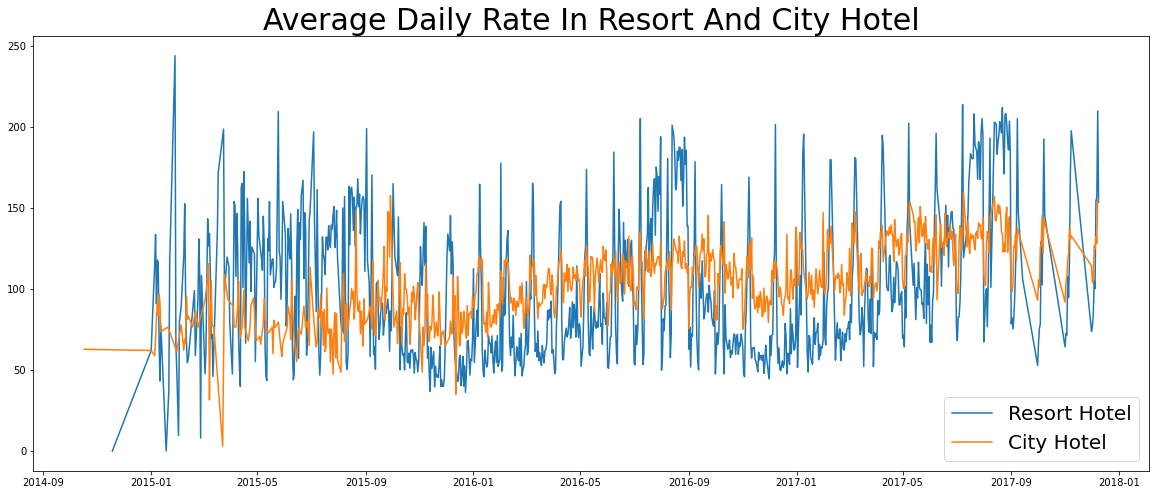

In [27]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate In Resort And City Hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

The above line graph shows that, on certain days the average daily rate for a city hotel is less than that of resort hotel, and on other days it is even less. It goes without saying that weekends and holidays may seea a rise in resort hotel rates.   

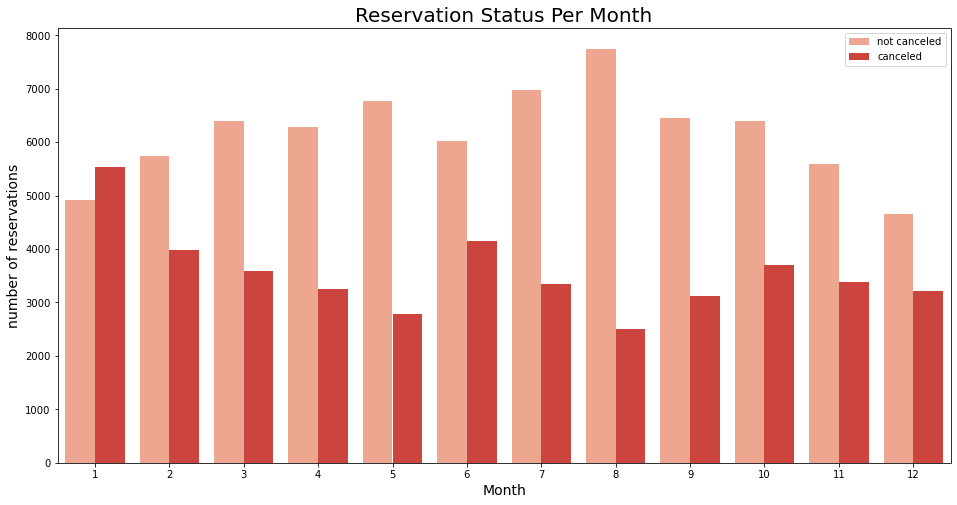

In [45]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax=sns.countplot(x='month',hue='is_canceled',data=df,palette='Reds')
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status Per Month",size=20)
plt.xlabel("Month",size=14)
plt.ylabel("number of reservations",size=14)
plt.legend(['not canceled','canceled'])
plt.show()

In the above chart we have developed the goruped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen both the number of confirmed reservations and the number of cancled reservations are largest in the month of augus. where as january is the month with the most cancled reservations.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


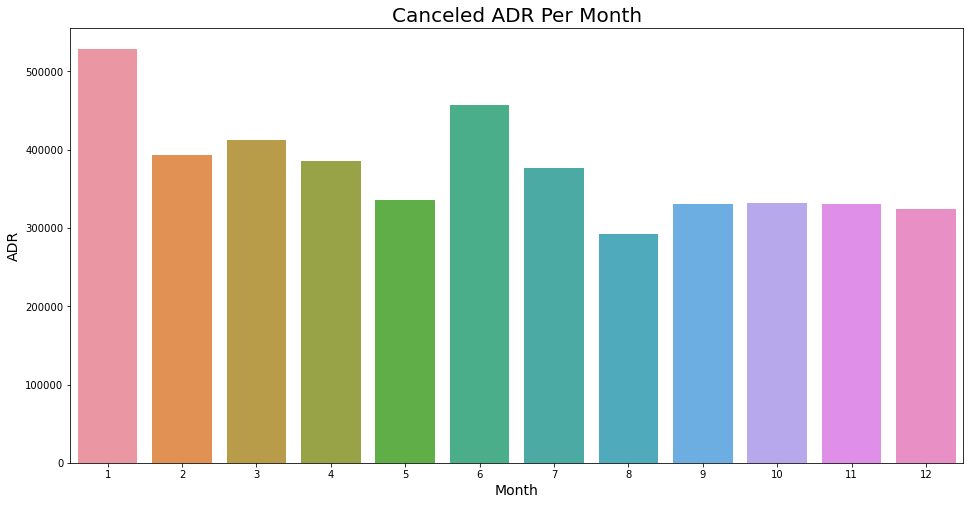

In [29]:
plt.figure(figsize=(16,8))
plt.title('Canceled ADR Per Month', fontsize=20)
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel("Month",size=14)
plt.ylabel("ADR",size=14)
plt.show()

This bar graph demonstrate that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

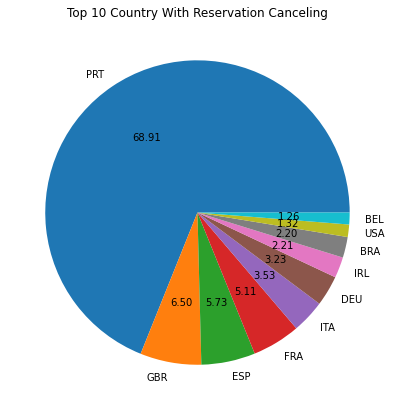

In [30]:
can_data=df[df['is_canceled']==1]
top_10=can_data['country'].value_counts()[:10]
plt.figure(figsize=(7,7))
plt.title("Top 10 Country With Reservation Canceling")
plt.pie(top_10,autopct='%.2f', labels=top_10.index)
plt.show()

In above chart we try to demonstarate the top 10 countrys with the highest reservation cancelations.
We can see that Portugal have a highest reservation caclettion that are 68.91% rather other country.

In [35]:
segment=df['market_segment'].value_counts()
segment

Online TA        56231
Offline TA/TO    23519
Groups           18302
Direct           12362
Corporate         5109
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

<BarContainer object of 7 artists>

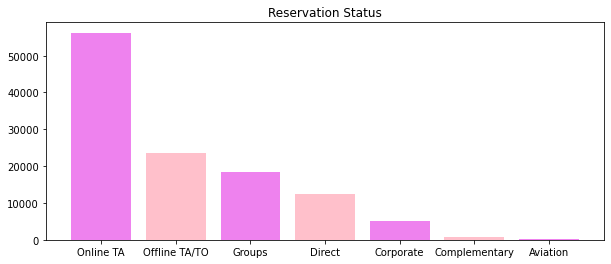

In [57]:
plt.figure(figsize=(10,4))
plt.title("Reservation Status")
plt.bar(['Online TA','Offline TA/TO','Groups','Direct','Corporate','Complementary','Aviation']
        ,df['market_segment'].value_counts(),color=['Violet', 'pink'])

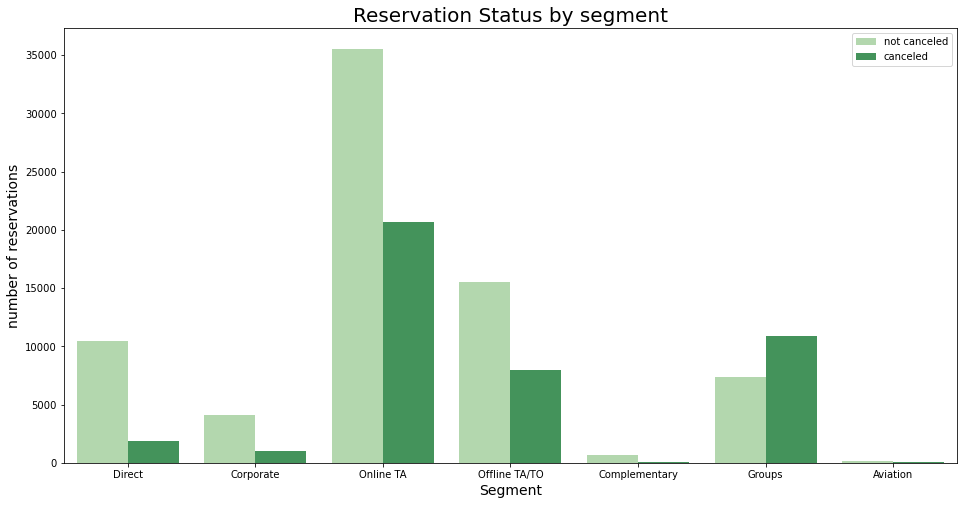

In [50]:

plt.figure(figsize=(16,8))
ax=sns.countplot(x=df['market_segment'],hue='is_canceled',data=df,palette='Greens')
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status by segment",size=20)
plt.xlabel("Segment",size=14)
plt.ylabel("number of reservations",size=14)
plt.legend(['not canceled','canceled'])
plt.show()

In [33]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.482694
Offline TA/TO    0.201890
Groups           0.157107
Direct           0.106117
Corporate        0.043856
Complementary    0.006301
Aviation         0.002034
Name: market_segment, dtype: float64

Hypothesis:
1.More cancellations occure when prices are high 
2.when there is a longer waiting list customers tend to cancle more frequently.
3.the majority of clients are coming from offline travel agent to make their reservations.